# Stock Analysis in matplotlib
Tutorial from http://blog.yhat.com/posts/stock-data-python.html  
An Introduction to Stock Market Data Analysis with Python (Part 1)  
Markdown: add two spaces to end to make newline.  

In [2]:
import pandas as pd
import quandl
import pandas_datareader as pdr # Use to import data from the web 
# Package and modules for importing data; this code may change depending on pandas version
import datetime # use for start and end dates 
import matplotlib.pyplot as plt

In [4]:
# Use google to get stock data 
aapl = pdr.get_data_google('AAPL', start = datetime.datetime(2016, 5, 7), end = datetime.datetime(2017, 6, 7))
# stock, start, end 
aapl.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2017-05-31,153.97,154.17,152.38,152.76,24451164
2017-06-01,153.17,153.33,152.22,153.18,16404088
2017-06-02,153.58,155.45,152.89,155.45,27770715
2017-06-05,154.34,154.45,153.46,153.93,25331662
2017-06-06,153.90,155.81,153.78,154.45,26624926


In [23]:
# Using quandl to import data 
aapl_quandl = quandl.get("WIKI/AAPL", start_date = "2006-6-1", end_date = "2012-6-1") # YYYY-MM-DD, not enforced
aapl_quandl.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2006-06-01,59.85,62.28,59.52,62.170,33661000.0,0.0,1.0,7.722767,8.036323,7.680186,8.022129,235627000.0
2006-06-02,62.99,63.10,60.88,61.660,24492400.0,0.0,1.0,8.127938,8.142132,7.855674,7.956321,171446800.0
2006-06-05,61.15,61.15,59.97,60.000,21635200.0,0.0,1.0,7.890513,7.890513,7.738252,7.742123,151446400.0
2006-06-06,60.22,60.63,58.91,59.723,25929900.0,0.0,1.0,7.770510,7.823415,7.601474,7.706380,181509300.0
2006-06-07,60.10,60.40,58.35,58.565,26803800.0,0.0,1.0,7.755026,7.793737,7.529214,7.556957,187626600.0


In [17]:
# aapl.describe()
# Look at last 10 observations of a column 
last_10_aapl = aapl['High'][-10:]
last_10_aapl

Date
2016-12-16    116.50
2016-12-19    117.38
2016-12-20    117.50
2016-12-21    117.40
2016-12-22    116.51
2016-12-23    116.52
2016-12-27    117.80
2016-12-28    118.02
2016-12-29    117.11
2016-12-30    117.20
Name: High, dtype: float64

In [33]:
# Sample 20 rows 
sample = aapl.sample(20) # sample 20 rows 
monthly_aapl = aapl.resample('M').mean() # Resample data so that aapl is at monthly level, not daily. 
# Resample is used to 
(monthly_aapl) 

,Open,High,Low,Close,Volume
Date,,,,,
2016-06-30,96.588636,97.477727,95.969091,96.622273,35483192
2016-07-31,98.450500,99.163500,98.002500,98.556500,34288980
2016-08-31,107.462609,108.140435,106.986522,107.665217,27396894
2016-09-30,110.673333,111.745238,109.807619,110.857143,46172816
2016-10-31,115.743810,116.388095,114.941429,115.707143,32710201
2016-11-30,110.098571,111.068095,108.988571,110.154286,34327979
2016-12-31,113.995238,115.025238,113.544762,114.335714,28989125
2017-01-31,119.093500,119.881000,118.785500,119.570000,28166558
2017-02-28,133.234737,134.161053,132.836842,133.713684,30261502


In [38]:
aapl['diff']= aapl.Open - aapl.Close
aapl.head()

,Open,High,Low,Close,Volume,diff
Date,,,,,,
2016-06-01,99.02,99.54,98.33,98.46,29173285,0.56
2016-06-02,97.60,97.84,96.63,97.72,40191600,-0.12
2016-06-03,97.79,98.27,97.45,97.92,28504888,-0.13
2016-06-06,97.99,101.89,97.55,98.63,23292504,-0.64
2016-06-07,99.25,99.87,98.96,99.03,22409450,0.22


- Open: Price of stock at start of trading day (may not be closing price of previous day) 
- High: Highest price of the stock on this day, Low is lowest 
- Close: Price at closing time 
- Volume: Amount of stocks traded 
- Adjusted Close: the closing price of the stock that adjusts the price of the stock for corporate actions
- Stock Split: Company makes all exisiting stocks worth two, halving the price of each 
- Dividends: Payout of company profits per share 

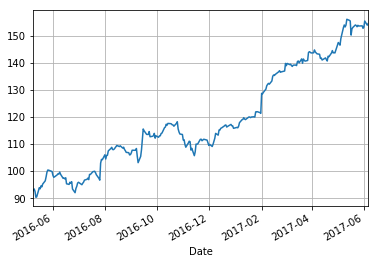

In [5]:
# Plot the closing prices for 'aapl'
aapl['Close'].plot(grid = True)
plt.show()

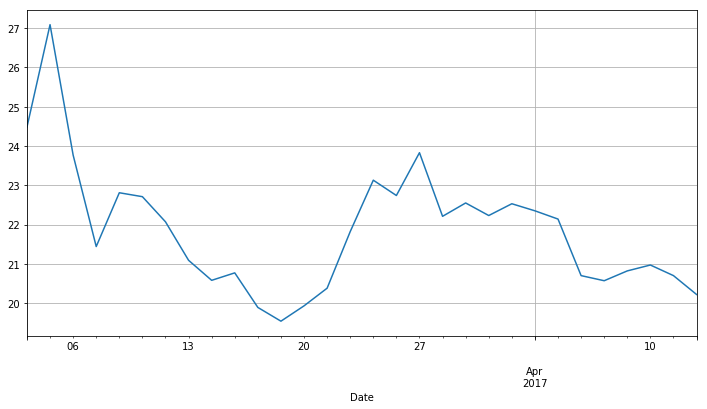

In [15]:
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = (12, 6) # Larger plots
stock["Adj Close"].plot(grid = True) # adds grid lining 

In [17]:
microsoft = web.DataReader("MSFT", "yahoo", start, end)
google = web.DataReader("GOOG", "yahoo", start, end)
apple = web.DataReader("AAPL", "yahoo", start, end)

myStocks = ['AAPL', 'GOOG', 'MSFT']
myStock_data = [web.DataReader(stock, "yahoo", start, end) for stock in myStocks]

In [18]:
# Create a DataFrame consisting of the adjusted closing price of these stocks, 
# first by making a list of these objects and using the join method
stocks = pd.DataFrame({myStock : stock["Adj Close"], #compare to others 
                       "AAPL": apple["Adj Close"],
                       "MSFT": microsoft["Adj Close"],
                       "GOOG": google["Adj Close"]})
stocks.tail()

,AAPL,GOOG,MSFT,SNAP
Date,,,,
2017-04-06,143.660004,827.880005,65.730003,20.570000
2017-04-07,143.339996,824.669983,65.680000,20.820000
2017-04-10,143.169998,824.729980,65.529999,20.969999
2017-04-11,141.630005,823.349976,65.480003,20.700001
2017-04-12,141.800003,824.320007,65.230003,20.219999


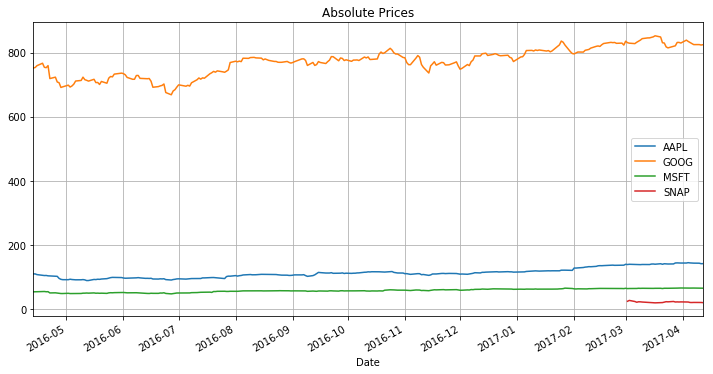

In [19]:
stocks.plot(grid = True, title="Absolute Prices") 

Since Google is a much more expensive stock, we should compare relative changes of these assets rather than their actual values. We can get a secondary_y axis for the others:

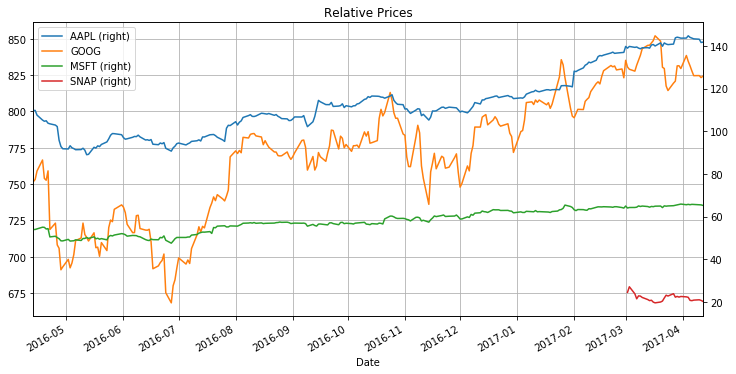

In [20]:
stocks.plot(secondary_y = ["AAPL", "MSFT", myStock], grid = True, title = "Relative Prices")

A "better" solution, though, would be to plot the information we actually want: the stock's returns. This involves transforming the data into something more useful for our purposes. There are multiple transformations we could apply.

One transformation would be to consider the stock's return since the beginning of the period of interest. In other words, we plot:

In [23]:
from IPython.display import display, Math, Latex
display(Math(r'return = \frac{price_t}{price_0}'))

<IPython.core.display.Math object>

In [24]:
# df.apply(arg) will apply the function arg to each column in df, and return a DataFrame with the result
# Recall that lambda x is an anonymous function accepting parameter x; in this case, x will be a pandas Series object
stock_return = stocks.apply(lambda x: x / x[0])
stock_return.head()

,AAPL,GOOG,MSFT,SNAP
Date,,,,
2016-03-18,1.000000,1.000000,1.000000,NaN
2016-03-21,0.999906,1.006087,1.006917,NaN
2016-03-22,1.007553,1.004271,1.010843,NaN
2016-03-23,1.001983,1.000624,1.008974,NaN
2016-03-24,0.997640,0.996882,1.013460,NaN


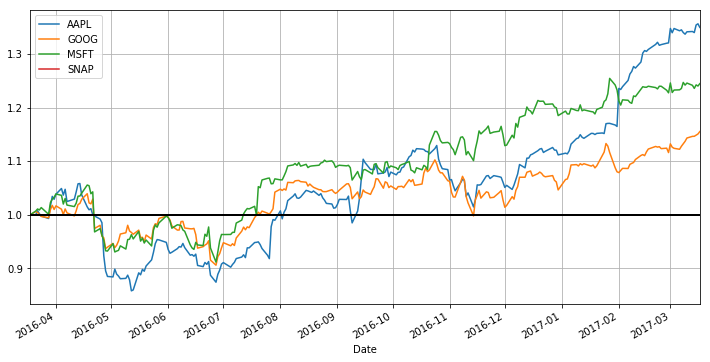

In [25]:
stock_return.plot(grid = True).axhline(y = 1, color = "black", lw = 2)

This is a much more useful plot. We can now see how profitable each stock was since the beginning of the period.
Furthermore, we see that these stocks are highly correlated; they generally move in the same direction, 
a fact that was difficult to see in the other charts.



In [45]:
# Use google to get stock data 
snap = pdr.get_data_google('SNAP', start = datetime.datetime(2016, 4, 1), end = datetime.datetime(2017, 6, 5))
# stock, start, end 
snap.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2017-05-26,21.66,21.70,21.07,21.22,13374035
2017-05-30,21.30,21.58,21.01,21.45,9509369
2017-05-31,21.50,21.75,21.09,21.21,9507158
2017-06-01,21.32,21.45,21.19,21.34,7146544
2017-06-02,21.34,21.45,21.00,21.09,9595392
